## Mariusz Mańka, Michał Hutnik
## Informatyka - niestajconarnie - V semestr 
## Wydział Matematyki Stosowanej
## Przedmiot: Języki Skryptowe w Analizie Danych
## Projekt Grupowy - Python

# Analiza przychodów wraz ze szczególnym rozróżnieniem czy dana osoba zarabia więcej niż 50 000 USD rocznie oraz do jakich grup społecznych należy.
**Dane w formacie CSV, użyte w tej analizie pochodzą ze strony: https://www.kaggle.com/uciml/adult-census-income  
oraz badają czy dana osoba zarabia powyżej 50 000 USD rocznie oraz jakie spełnia przy tym warunki.**

## Cel analizy:
Celem naszej analizy jest ustalenie do jakich grup należą oraz jakie warunki najczęściej spełniają osoby zarabiajace powyżej 50 000 rocznie. Chcemy ustalić przybliżony profil takiej osoby.


### Opis kolumn:
- **age** - `int64` - Wiek badanej osoby
- **workclass** - `string`- Forma zatrudnienia badanej osoby
- **fnlwgt** - `int64` - Szacowana liczba osób, które reprezentuje każdy wiersz danych (liczba osób o podobnym zestawie cech)
- **education** - `string` - Zdobyte wykształcenie
- **educational-num** - `int64` - Lata nauki
- **marital-status** - `string` - Stan cywilny
- **occupation** - `string` - Zawód wykonywany przez badaną osobę
- **relationship** - `string` - Relacje rodzinne badanej osoby
- **race** - `string` - Rasa
- **gender** - `string` - Płeć
- **capital-gain** - `int64` - Zysk kapitałowy
- **capital-loss** - `int64` - Strata kapitału
- **hours-per-week** - `int64` - Godziny pracy w tygodniu
- **native-country** - `string` - Kraj ojczysty
- **income_>50K** - `int64` - Informacja czy badana osoba osiągnęła zysk powyżej 50 000.
 


# Import oraz odczyt danych

In [2]:
#Income dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Pobieramy dane do dalszej obróbki wskazując że dane oddzielone są przecinkiem

In [3]:
CSV_DATA_URL = "https://community052.blob.core.windows.net/csvs/train.csv"
df_income = pd.read_csv(CSV_DATA_URL, delimiter=',')

### Przykładowa struktura bazy danych w postaci tabeli (pierwsze 40 rekordów)

In [4]:
df_income.head(40)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,0
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1


### Podstawowe informacje o strukturze danych:

In [5]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


### Unikalne wartości opisowe dla poszczególnych kolumn 

In [6]:
print("workclass:")
print(df_income["workclass"].unique(), end='\n\n')
print("education:")
print(df_income["education"].unique(), end='\n\n')
print("marital-status:")
print(df_income["marital-status"].unique(), end='\n\n')
print("occupation:")
print(df_income["occupation"].unique(), end='\n\n')
print("relationship:")
print(df_income["relationship"].unique(), end='\n\n')
print("race:")
print(df_income["race"].unique(), end='\n\n')
print("gender:")
print(df_income["gender"].unique(), end='\n\n')

workclass:
['Private' 'State-gov' 'Self-emp-not-inc' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' nan 'Never-worked' 'Without-pay']

education:
['Doctorate' '12th' 'Bachelors' '7th-8th' 'Some-college' 'HS-grad' '9th'
 '10th' '11th' 'Masters' 'Preschool' '5th-6th' 'Prof-school' 'Assoc-voc'
 '1st-4th' 'Assoc-acdm']

marital-status:
['Divorced' 'Never-married' 'Married-civ-spouse' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

occupation:
['Exec-managerial' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Machine-op-inspct' 'Sales' 'Handlers-cleaners' 'Farming-fishing'
 'Protective-serv' 'Prof-specialty' 'Craft-repair' nan 'Tech-support'
 'Priv-house-serv' 'Armed-Forces']

relationship:
['Not-in-family' 'Own-child' 'Husband' 'Wife' 'Unmarried' 'Other-relative']

race:
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

gender:
['Male' 'Female']



# Przygotowanie danych do dalszej pracy


In [7]:
df_income.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income_>50K         int64
dtype: object

### Konwertujemy kolumnę `income_>50k` z typu int64 na typ bool. Dane w tej kolumnie zawierają wartości 1 lub 0 stąd konwersja przebiega bez problemu.

In [8]:
df_income['income_>50K'] = df_income['income_>50K'].astype(bool)
df_income['income_>50K']

0         True
1        False
2         True
3        False
4        False
         ...  
43952     True
43953    False
43954    False
43955    False
43956    False
Name: income_>50K, Length: 43957, dtype: bool

In [9]:
df_income['income_>50K'].dtype

dtype('bool')

# Podstawowe statystyki:

In [10]:
print('Minimalny wiek w zbiorze:')
print(df_income["age"].min(), end='\n\n')

print('Maksymalny wiek w zbiorze:')
print(df_income['age'].max(), end='\n\n')

print('Średni wiek w zbiorze:')
print(np.round(df_income['age'].mean(), 2), end='\n\n')

print('5 najczęściej wykonywanych zawodów:', end='\n')
print(df_income['occupation'].value_counts()[:5], end='\n\n')

print('Rekord posiadający największy zysk kapitałowy:')
print(df_income.loc[df_income['capital-gain'].idxmax()], end='\n\n')

print('Rekord posiadający największą stratę zysku kapitałowego:')
print(df_income.loc[df_income['capital-loss'].idxmax()], end='\n\n')

print('Osoba pracująca najwięcej tygodniowo:')
print(df_income.loc[df_income['hours-per-week'].idxmax()], end='\n\n')

print('Osoba pracująca najmniej tygodniowo:')
print(df_income.loc[df_income['hours-per-week'].idxmin()], end='\n\n')

Minimalny wiek w zbiorze:
17

Maksymalny wiek w zbiorze:
90

Średni wiek w zbiorze:
38.62

5 najczęściej wykonywanych zawodów:
Craft-repair       5519
Prof-specialty     5518
Exec-managerial    5506
Adm-clerical       5004
Sales              4965
Name: occupation, dtype: int64

Rekord posiadający największy zysk kapitałowy:
age                             67
workclass                  Private
fnlwgt                      366425
education                Doctorate
educational-num                 16
marital-status            Divorced
occupation         Exec-managerial
relationship         Not-in-family
race                         White
gender                        Male
capital-gain                 99999
capital-loss                     0
hours-per-week                  60
native-country       United-States
income_>50K                   True
Name: 0, dtype: object

Rekord posiadający największą stratę zysku kapitałowego:
age                             82
workclass                  Privat

# Podstawowe analizy:

### Wykres kołowy przedstawiający podział całego zbioru danych ze względu na płeć 

gender
Female    14557
Male      29400
dtype: int64

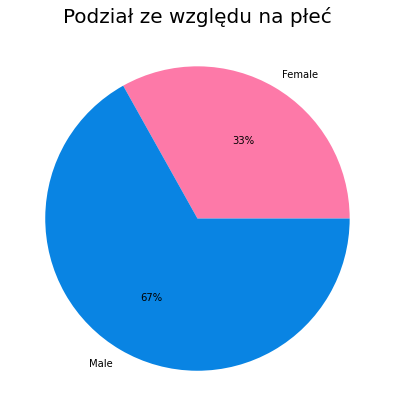

In [11]:
plt.subplots(figsize=(7,7))
df_income.groupby(['gender']).size().plot(kind='pie', ylabel="", autopct='%1.0f%%', colors=['#fd79a8', '#0984e3'])
plt.title('Podział ze względu na płeć', fontsize=20)
df_income.groupby(['gender']).size()

### Wykres kołowy przedstawiający ilość osób pracujących ponad średnią liczbę godzin w tygodniu z podziałem na płeć

Średnia liczba godzin przepracowanych w tygodniu dla całego zbioru: 40.41


gender
Female     2351
Male      10553
dtype: int64

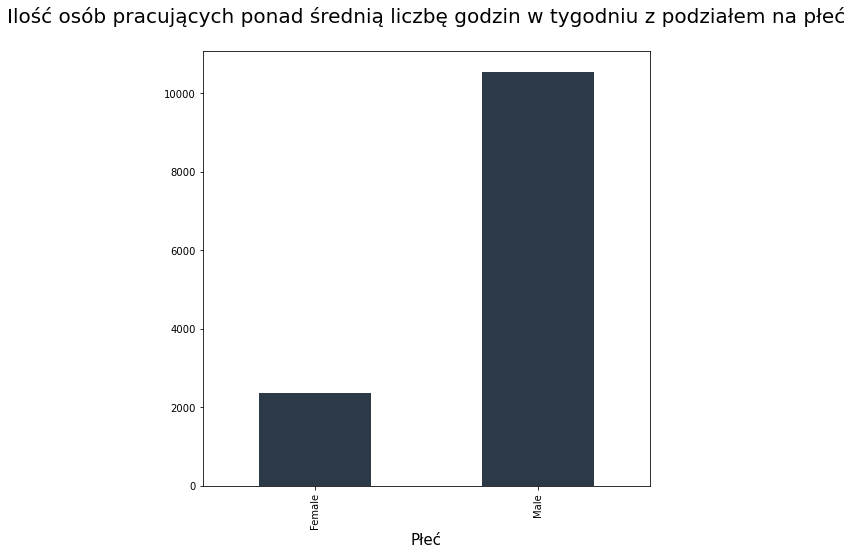

In [12]:
plt.subplots(figsize=(8,8))
print("Średnia liczba godzin przepracowanych w tygodniu dla całego zbioru: ", end='')
print(np.round(df_income['hours-per-week'].mean(), 2))
df_income[(df_income['hours-per-week'] > df_income['hours-per-week'].mean())].groupby('gender').size().plot(kind='bar',
    ylabel="", 
    color=['#2C3A47'],
)

plt.xlabel('Płeć', fontsize=15)
plt.title('Ilość osób pracujących ponad średnią liczbę godzin w tygodniu z podziałem na płeć\n', fontsize=20)
df_income[(df_income['hours-per-week'] > df_income['hours-per-week'].mean())].groupby('gender').size()

### Wykres kołowy przedstawiający podział całego zbioru danych ze względu na rasę

race
Amer-Indian-Eskimo      421
Asian-Pac-Islander     1373
Black                  4218
Other                   373
White                 37572
dtype: int64

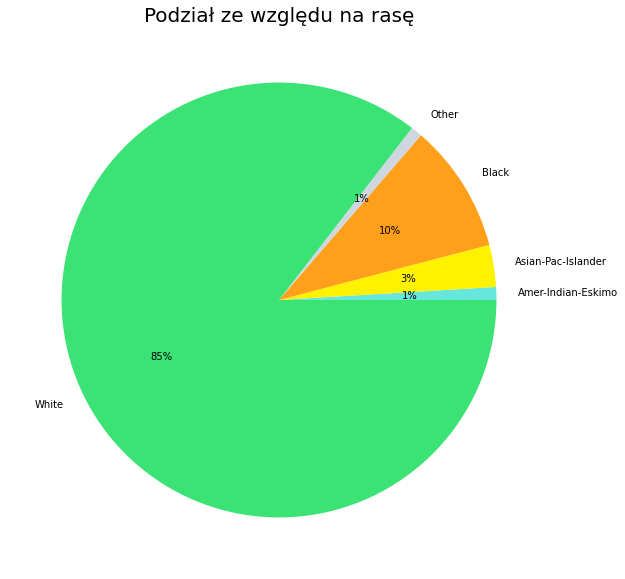

In [13]:
plt.subplots(figsize=(10,10))
df_income.groupby(['race']).size().plot(kind='pie',ylabel="", autopct='%1.0f%%', colors=['#67e6dc', '#fff200', '#ff9f1a', '#ced6e0', '#3ae374' ])
plt.title('Podział ze względu na rasę', fontsize=20)
df_income.groupby(['race']).size()

### Wykres słupkowy przedstawiający podział  całego zbioru ze względu na wiek
**Rozróżniliśmy 5 grup wiekowych:**
- 17 do 25 lat
- 26 do 35 lat
- 36 do 50 lat
- 51 do 68 lat
- oraz 68 i więcej

In [14]:
numbers = []
age_ranges =["17-25 lat","26-35 lat","36-50 lat","51-68 lat","68+ lat"]
numbers.append(len(df_income[(df_income['age']>16) & (df_income['age']<=25)]))
numbers.append(len(df_income[(df_income['age']>25) & (df_income['age']<=35)]))
numbers.append(len(df_income[(df_income['age']>35) & (df_income['age']<=50)]))
numbers.append(len(df_income[(df_income['age']>50) & (df_income['age']<=68)]))
numbers.append(len(df_income[(df_income['age']>68)]))

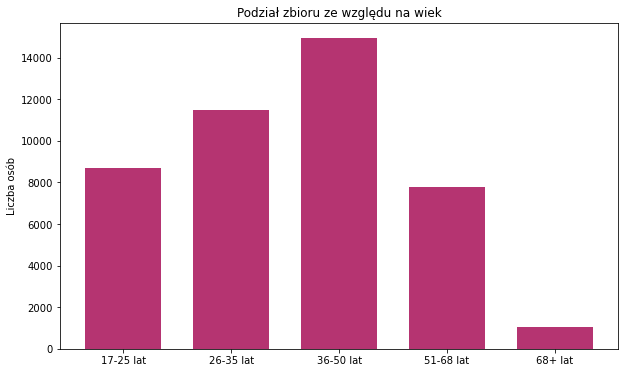

In [15]:
plt.subplots(figsize=(10,6))
plt.bar(range(len(numbers)), numbers, width = 0.7, color='#B53471')
plt.title('Podział zbioru ze względu na wiek')
plt.ylabel('Liczba osób')
plt.xticks(np.arange(5), age_ranges)
plt.show()

### Wykres kołowy przedstawiający ilość osób zarabiających więcej niż 50 000 USD rocznie

income_>50K
False    33439
True     10518
dtype: int64

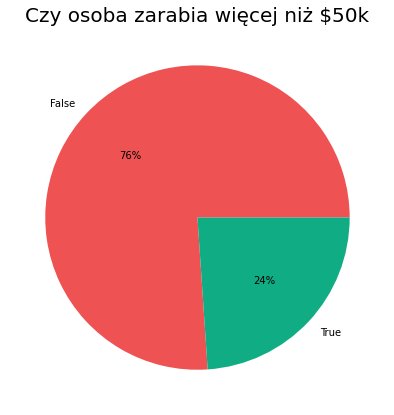

In [16]:
plt.subplots(figsize=(7,7))
df_income.groupby(['income_>50K']).size().plot(kind='pie', ylabel='', autopct='%1.0f%%', colors=['#ee5253', '#10ac84'])
plt.title('Czy osoba zarabia więcej niż $50k', fontsize=20)
df_income.groupby(['income_>50K']).size()

### Wykres kołowy dzielący zbiór osób zarabiających POWYŻEJ 50 000 ze względu na wykonywany zawód

occupation
Adm-clerical          668
Armed-Forces            4
Craft-repair         1259
Exec-managerial      2633
Farming-fishing       158
Handlers-cleaners     131
Machine-op-inspct     328
Other-service         182
Priv-house-serv         3
Prof-specialty       2496
Protective-serv       280
Sales                1337
Tech-support          383
Transport-moving      420
dtype: int64

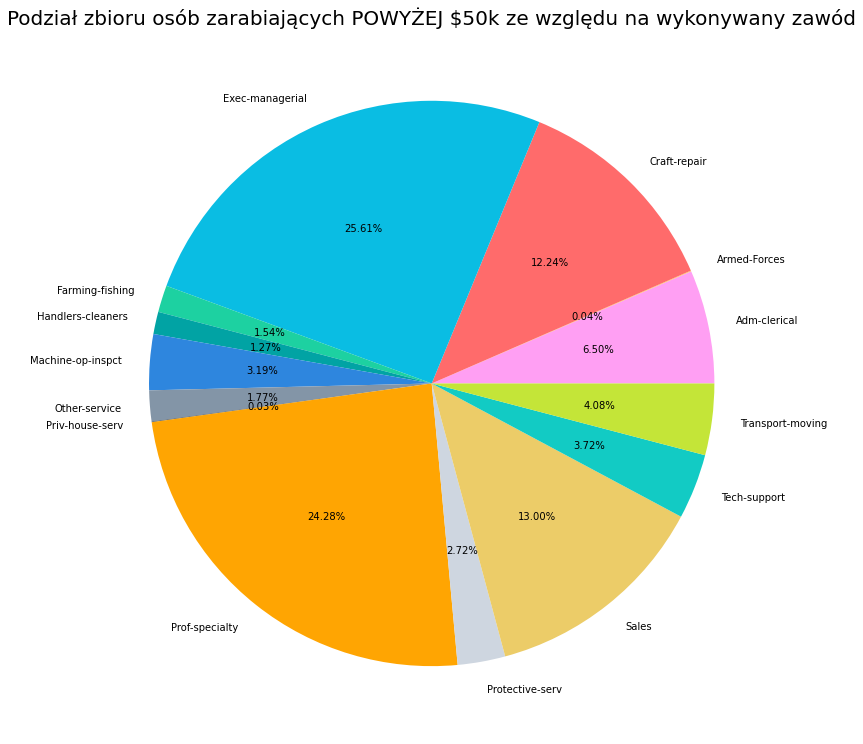

In [17]:
plt.subplots(figsize=(13,13))
df_income[df_income["income_>50K"] == True].groupby(['occupation']).size().plot(
    kind='pie', 
    ylabel='', 
    autopct='%.2f%%',
    colors=['#ff9ff3','#feca57','#ff6b6b','#0abde3','#1dd1a1','#01a3a4','#2e86de','#8395a7','#222f3e', '#ffa502', '#ced6e0', '#eccc68', '#12CBC4', '#C4E538']
)
plt.title('Podział zbioru osób zarabiających POWYŻEJ $50k ze względu na wykonywany zawód', fontsize=20)
df_income[df_income["income_>50K"] == True].groupby(['occupation']).size()


### Wykres kołowy dzielący zbiór osób zarabiających PONIŻEJ 50 000 ze względu na wykonywany zawód

occupation
Adm-clerical         4336
Armed-Forces            9
Craft-repair         4260
Exec-managerial      2873
Farming-fishing      1190
Handlers-cleaners    1747
Machine-op-inspct    2383
Other-service        4266
Priv-house-serv       222
Prof-specialty       3022
Protective-serv       594
Sales                3628
Tech-support          938
Transport-moving     1701
dtype: int64

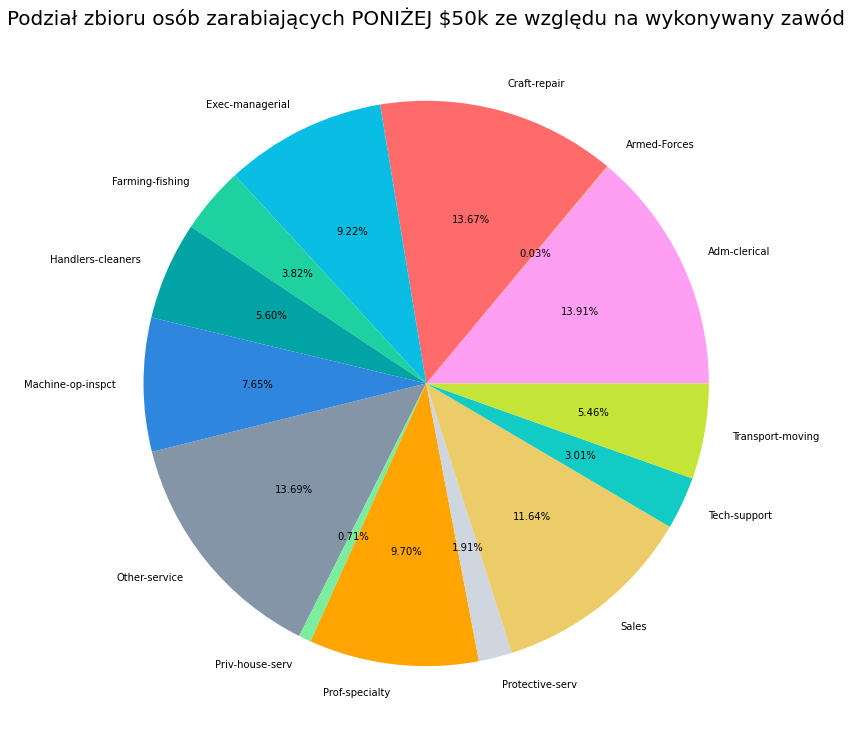

In [18]:
plt.subplots(figsize=(13,13))
df_income[df_income["income_>50K"] == False].groupby(['occupation']).size().plot(
    kind='pie', 
    ylabel='', 
    autopct='%.2f%%',
    colors=['#ff9ff3','#feca57','#ff6b6b','#0abde3','#1dd1a1','#01a3a4','#2e86de','#8395a7','#7bed9f', '#ffa502', '#ced6e0', '#eccc68', '#12CBC4', '#C4E538']
)
plt.title('Podział zbioru osób zarabiających PONIŻEJ $50k ze względu na wykonywany zawód', fontsize=20)
df_income[df_income["income_>50K"] == False].groupby(['occupation']).size()

### Wykres słupkowy przedstawiający podział  osób z przychodem powyżej 50k ze względu na wiek
**Tak jak poprzednio w celu analizy rozróżniliśmy 5 grup wiekowych:**
- 17 do 25 lat
- 26 do 35 lat
- 36 do 50 lat
- 51 do 68 lat
- oraz 68 i więcej

In [19]:
numbers = []
age_ranges =["17-25 lat","26-35 lat","36-50 lat","51-68 lat","68+ lat"]
numbers.append(len(df_income[(df_income['age']>16) & (df_income['age']<=25) & (df_income['income_>50K'] == True)]))
numbers.append(len(df_income[(df_income['age']>25) & (df_income['age']<=35) & (df_income['income_>50K'] == True)]))
numbers.append(len(df_income[(df_income['age']>35) & (df_income['age']<=50) & (df_income['income_>50K'] == True)]))
numbers.append(len(df_income[(df_income['age']>50) & (df_income['age']<=68) & (df_income['income_>50K'] == True)]))
numbers.append(len(df_income[(df_income['age']>68) & (df_income['income_>50K'] == True)]))

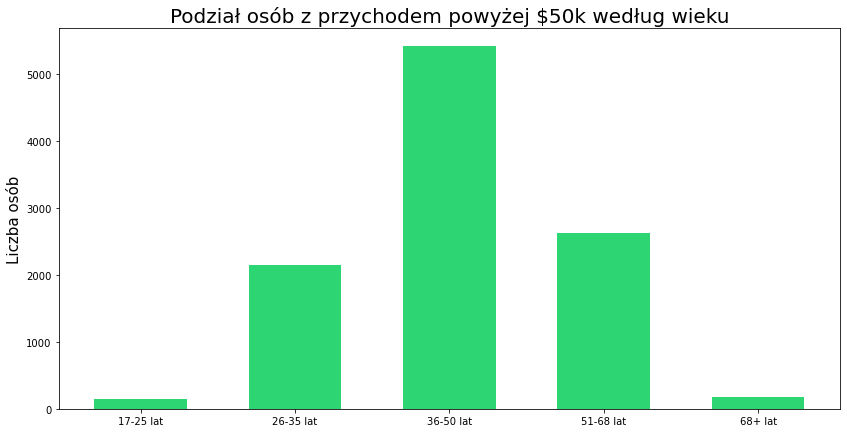

In [20]:
plt.subplots(figsize=(14,7))
plt.bar(range(len(numbers)), numbers, width = 0.6, color='#2ed573')
plt.title('Podział osób z przychodem powyżej $50k według wieku', fontsize=20)
plt.ylabel('Liczba osób', fontsize=15)
plt.xticks(np.arange(5), age_ranges)
plt.show()

In [21]:
df_income["age"].corr(df_income["income_>50K"])

0.23098752777804318

### Macierz przedstawiająca korelacje kolumn między sobą
**Zbadajmy korelację kolumny Income>50k z pozostałymi, a by stwierdzić co ma największy wpływ na wysokie zarobki**

Jak widać największy wpływ na wysokie zarobki ma wykształcenie, a potem wiek oraz ilość godzin pracy w ciągu tygodnia. Jednak współczynnik korelacji to tylko około 0.4, więc jest to jednak dość niska wartość

<AxesSubplot:>

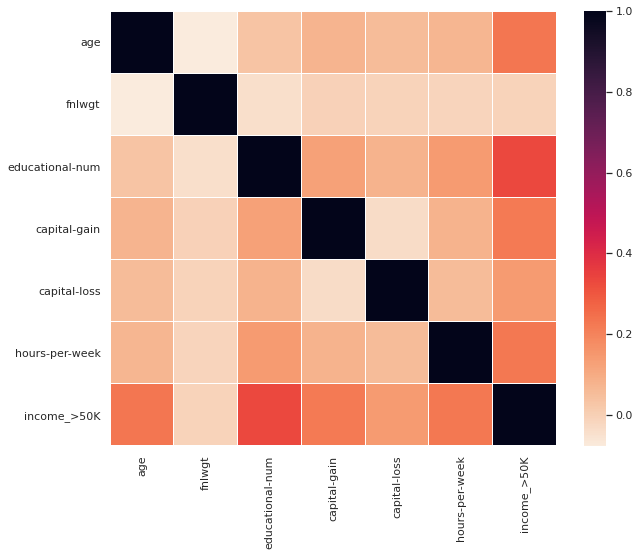

In [42]:
m = df_income.corr()
sns.set(rc={"figure.figsize":(10, 8)}) #width=8, height=4
sns.heatmap(m,cmap="rocket_r", linewidths=0.1)

## Analiza czasu pracy a zarobków
### Na tym wykresie przedstawiony mamy procentowy udział osób pracujących w poszczególnych zakresach godzinowych w tygodniu

**Na wykresie mamy wyraźnie przedstawione,że to właśnie osoby pracujące ponad 1 etat mają nawiększą szanse zarobić ponad $50k** 

In [23]:
df_income['income_>50K']>0

numbers = []
age_ranges =["0-20 h/week","21-40 h/week","40-60 h/week","61+/week"]
hours = [0,20,40,60]
for i in range(0,len(hours),1):
    if len(hours) == i+1:
        mianownik = len(df_income[df_income['hours-per-week']>hours[i]])
        licznik = len(df_income[(df_income['hours-per-week']>hours[i]) & (df_income['income_>50K']>0)])
        result = licznik/mianownik
    else:
        mianownik = len(df_income[(df_income['hours-per-week']>hours[i]) & (df_income['hours-per-week']<=hours[i+1])])
        licznik = len(df_income[(df_income['hours-per-week']>hours[i]) & (df_income['hours-per-week']<=hours[i+1]) & (df_income['income_>50K']>0)])
        result = licznik/mianownik
    numbers.append(result)

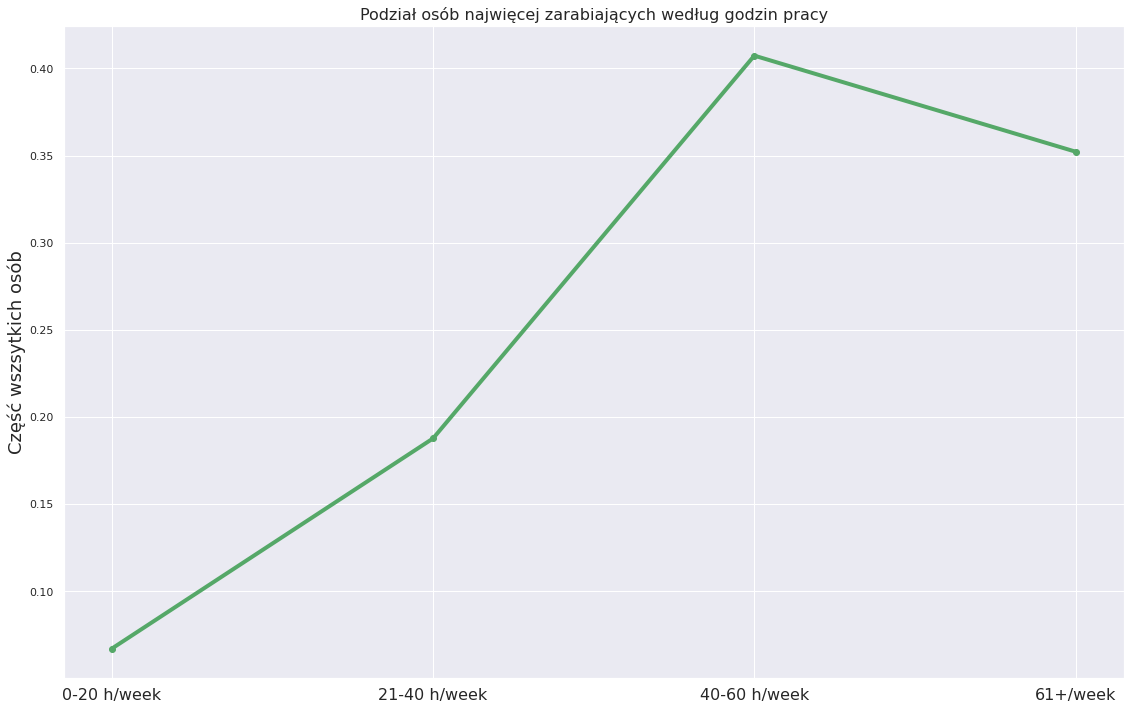

In [43]:
plt.subplots(figsize=(19,12))
plt.plot(range(len(numbers)), numbers, marker="o", color='g', linewidth=4)
plt.title('Podział osób najwięcej zarabiających według godzin pracy',fontsize=16)
plt.ylabel("Część wszsytkich osób", fontsize=18)
plt.xticks(np.arange(4), age_ranges, fontsize=16)
plt.show()